In [84]:
# Import API key
from api_keys import geoapify_key
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import datetime
import math

# Import API key
from api_keys import geoapify_key

In [3]:
# Reading csv file and saving it as a dataframe
csv_file_path = 'Resource/uber.csv'
uber_df = pd.read_csv(csv_file_path)

In [4]:
# Origianl data
print(len(uber_df))
uber_df.head()

200000


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
# Define haversine function to calculate distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

In [76]:
# Cleaning useless data
uber_df_filtered = uber_df.loc[((uber_df["pickup_latitude"] > 20) &
                               (uber_df["pickup_longitude"] < -60))]

# Calculating distance between 2 coordinates
uber_df_filtered['distance'] = uber_df_filtered.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                                            row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Cleaning more useless data
uber_df_filtered = uber_df_filtered.loc[(uber_df_filtered["distance"] != 0) &
                                        (uber_df_filtered["distance"] < 300)]

# Adding columns of interest
uber_df_filtered["date"] = uber_df_filtered["key"]
uber_df_filtered["date"] = pd.to_datetime(uber_df_filtered['date']).dt.date
uber_df_filtered["year"] = pd.to_datetime(uber_df_filtered['date']).dt.year
uber_df_filtered['date'] = pd.to_datetime(uber_df_filtered['date']) # Converting date to datetime type
# Adding month
uber_df_filtered["month"] = uber_df_filtered["date"]
uber_df_filtered["month"] = pd.to_datetime(uber_df_filtered['date']).dt.month 
# Adding season
uber_df_filtered["season"] = ""
uber_df_filtered.loc[(uber_df_filtered["month"] == 12) | (uber_df_filtered["month"] == 1) | (uber_df_filtered["month"] == 2), "season"] = "Winter"
uber_df_filtered.loc[(uber_df_filtered["month"] == 3) | (uber_df_filtered["month"] == 4) | (uber_df_filtered["month"] == 5), "season"] = "Spring"
uber_df_filtered.loc[(uber_df_filtered["month"] == 6) | (uber_df_filtered["month"] == 7) | (uber_df_filtered["month"] == 8), "season"] = "Summer"
uber_df_filtered.loc[(uber_df_filtered["month"] == 9) | (uber_df_filtered["month"] == 10) | (uber_df_filtered["month"] == 11), "season"] = "Authum"

# Printing
print(len(uber_df_filtered))
uber_df_filtered.sort_values(by="distance").tail(100)


C:\Users\oscar\AppData\Local\Temp\ipykernel_6488\1794063682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_filtered['distance'] = uber_df_filtered.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],


193813


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,date,year,month,season
110500,4395702,2014-05-01 23:42:33.0000002,103.66,2014-05-01 23:42:33 UTC,-73.864010,40.769851,-74.112382,40.578808,1,29.832848,2014-05-01,2014,5,Spring
121208,6390582,2011-09-09 03:12:00.00000013,15.70,2011-09-09 03:12:00 UTC,-73.891693,40.944180,-73.980150,40.680338,1,30.267652,2011-09-09,2011,9,Authum
51720,29913110,2013-03-05 22:27:22.0000002,94.66,2013-03-05 22:27:22 UTC,-73.974947,40.760719,-74.188247,40.539005,2,30.522244,2013-03-05,2013,3,Spring
46327,5661652,2011-11-01 16:47:00.00000067,16.10,2011-11-01 16:47:00 UTC,-73.235053,40.800935,-72.956287,40.980410,1,30.779263,2011-11-01,2011,11,Authum
23232,230309,2014-03-25 21:43:05.0000004,121.33,2014-03-25 21:43:05 UTC,-73.804839,40.661458,-74.095215,40.831124,1,30.891867,2014-03-25,2014,3,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197483,34261866,2011-05-09 13:41:53.0000002,49.80,2011-05-09 13:41:53 UTC,-75.342288,40.646767,-73.976186,39.615770,1,163.187094,2011-05-09,2011,5,Spring
37122,35004236,2011-05-28 07:49:41.0000003,17.30,2011-05-28 07:49:41 UTC,-73.967302,40.759383,-75.458979,39.653763,1,176.519082,2011-05-28,2011,5,Spring
24751,1200661,2011-02-17 18:30:35.0000002,27.30,2011-02-17 18:30:35 UTC,-75.426904,40.774075,-73.971779,39.622013,1,177.995633,2011-02-17,2011,2,Winter
175976,21734118,2014-03-17 13:25:00.00000012,20.50,2014-03-17 13:25:00 UTC,-73.955800,40.772690,-71.718700,42.424147,1,261.372661,2014-03-17,2014,3,Spring


In [59]:
# Summary of number of trips per year
total_by_year = uber_df_filtered.groupby("year")
by_year_summary = total_by_year.count()
totals = by_year_summary["date"]

# Summary of average distance of trips per year
distance_by_year = uber_df_filtered.groupby("year")
by_year_distance = distance_by_year.mean()
distance = by_year_distance["distance"]

# Summary of longest distance of a trip per year
distance_by_year = uber_df_filtered.groupby("year")
by_year_distance = distance_by_year.max()
long_distance = by_year_distance["distance"]

# Summary average number of passangers per trip per year
passangers_by_year = uber_df_filtered.groupby("year")
by_year_passangers = passangers_by_year.mean()
passangers = by_year_passangers["passenger_count"]

# Summary total of passangers per year
passangerst_by_year = uber_df_filtered.groupby("year")
by_year_passangerst = passangerst_by_year.sum()
passangerst = by_year_passangerst["passenger_count"]

# Summary of average price per trip per year
price_by_year = uber_df_filtered.groupby("year")
by_year_price = price_by_year.mean()
price = by_year_price["fare_amount"]

# Merging data
summary = pd.merge(totals, distance, on="year")
summary1 = pd.merge(summary, long_distance, on="year")
summary2 = pd.merge(summary1, passangers, on="year")
summary3 = pd.merge(summary2, passangerst, on="year")
summary4 = pd.merge(summary3, price, on="year")
summary4 = summary4.rename(columns={"date": "Number of trips", "distance_x": "Average Distance per trip", "distance_y": "Longest distance on a single trip",
                                    "passenger_count_x": "Average Number of passangers per trip", "passenger_count_y": "Total of passanger per year", 
                                    "fare_amount": "Average price per trip"})
summary4.index.names = ["Year"]

# Printing
summary4

C:\Users\oscar\AppData\Local\Temp\ipykernel_6488\2949448837.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_year_distance = distance_by_year.mean()
C:\Users\oscar\AppData\Local\Temp\ipykernel_6488\2949448837.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_year_passangers = passangers_by_year.mean()
C:\Users\oscar\AppData\Local\Temp\ipykernel_6488\2949448837.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functi

,Number of trips,Average Distance per trip,Longest distance on a single trip,Average Number of passangers per trip,Total of passanger per year,Average price per trip
Year,,,,,,
2009,29775,3.226380,99.162509,1.686818,50225,9.984707
2010,29171,3.269107,115.073410,1.682904,49092,10.120738
2011,30789,3.432964,177.995633,1.660691,51131,10.405566
2012,31189,3.432757,285.462911,1.664016,51899,11.195657
2013,30302,3.452210,53.066101,1.712890,51904,12.682412
2014,29116,3.465196,261.372661,1.701813,49550,12.978453
2015,13471,3.423543,46.086169,1.684953,22698,12.949738


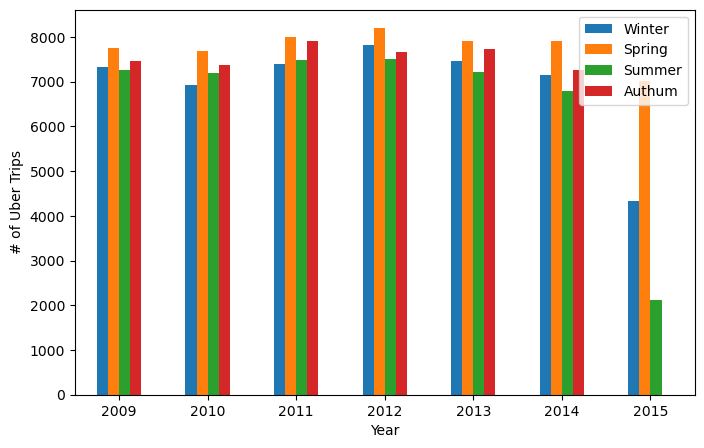

<Figure size 640x480 with 0 Axes>

In [133]:
# Organising data to plot total of trips per season of the year
per_season = uber_df_filtered.groupby(["year", "season"]).count()
per_season = per_season.reset_index()
per_season = per_season.iloc[:,0:3].rename(columns={"Unnamed: 0": "Number of trips", "year": "Year", "season": "Season"})
per_season = per_season.set_index("Year")
authum = per_season.iloc[[0,4,8,12,16,20],1]
spring = per_season.iloc[[1,5,9,13,17,21,24],1]
summer = per_season.iloc[[2,6,10,14,18,22,25],1]
winter = per_season.iloc[[3,7,11,15,19,23,26],1]
dictionary = {"Winter": winter, "Spring": spring, "Summer": summer, "Authum": authum}
season_df = pd.DataFrame(dictionary)

# Plotting
multi_plot = season_df.plot(kind="bar", figsize=(8,5))
plt.xticks(rotation="horizontal")
plt.xlabel("Year")
plt.ylabel("# of Uber Trips")
plt.show()
plt.tight_layout()

# Saving plot
plt.savefig("output_data/Fig1.png")

In [75]:
# Filtering 2014
uber_2014 = uber_df_filtered.loc[(uber_df_filtered["date"] >= '2014-01-01') &
                                 (uber_df_filtered["date"] < '2015-01-01')].sort_values(by="date").reset_index(drop=True)

# Adding month
uber_2014["month"] = uber_2014["date"]
uber_2014["month"] = pd.to_datetime(uber_2014['date']).dt.month # Adding month

uber_2014["season"] = ""
uber_2014.loc[(uber_2014["month"] == 12) | (uber_2014["month"] == 1) | (uber_2014["month"] == 2), "season"] = "Winter"
uber_2014.loc[(uber_2014["month"] == 3) | (uber_2014["month"] == 4) | (uber_2014["month"] == 5), "season"] = "Spring"
uber_2014.loc[(uber_2014["month"] == 6) | (uber_2014["month"] == 7) | (uber_2014["month"] == 8), "season"] = "Summer"
uber_2014.loc[(uber_2014["month"] == 9) | (uber_2014["month"] == 10) | (uber_2014["month"] == 11), "season"] = "Authum"

print(len(uber_2014))
uber_2014.head()
#uber_2014.iloc[[15000]]

#uber_df_sorted = uber_df_sorted.drop(uber_df_sorted["pickup_latitude"] == 0].index)

#northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
#Sort the DataFrame by 'key' and ascending datetime
#uber_df_sorted = uber_df_filtered.sort_values(by='pickup_longitude', ascending=False)

# Reset the index
#uber_df_sorted = uber_df_sorted.reset_index(drop=True)
#print(len(uber_df_sorted))
#uber_df_filtered.head()
#uber_df_filtered.dtypes 

29116


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,distance,month,season
0,45412823,2014-01-01 02:17:00.000000180,9.0,2014-01-01 02:17:00 UTC,-73.989392,40.747792,-73.987185,40.729932,1,2014-01-01,2014,1.994627,1,Winter
1,35560362,2014-01-01 18:54:00.000000155,7.5,2014-01-01 18:54:00 UTC,-73.949800,40.787482,-73.939275,40.804342,2,2014-01-01,2014,2.073559,1,Winter
2,3231594,2014-01-01 05:04:00.0000009,10.5,2014-01-01 05:04:00 UTC,-73.957345,40.722437,-73.984755,40.719902,5,2014-01-01,2014,2.327083,1,Winter
3,41343160,2014-01-01 06:29:06.0000002,16.0,2014-01-01 06:29:06 UTC,-73.977964,40.760273,-73.991949,40.713821,1,2014-01-01,2014,5.297918,1,Winter
4,32760268,2014-01-01 04:25:00.00000026,15.0,2014-01-01 04:25:00 UTC,-73.977665,40.763337,-73.921932,40.736492,1,2014-01-01,2014,5.563417,1,Winter


In [50]:
# Configure the map plot
map_plot_1 = uber_2015.hvplot.points(
    "pickup_longitude",
    "pickup_latitude",
    geo = True,
    tiles = "OSM",
    scale = 1,
    hover_cols = ["Unnamed: 0"],
    #size = "passenger_count",
    frame_width = 1000,
    frame_height = 500
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [pickup_longitude,pickup_latitude]   (Unnamed: 0)